<a href="https://colab.research.google.com/github/MaxVer01/Dataset-projectdataminingHAN/blob/main/DataMining_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

In [ ]:
#First we import our data-set: Asthma Disease Prediction
import pandas as pd

In [ ]:
csv = 'https://raw.githubusercontent.com/MaxVer01/Dataset-projectdataminingHAN/main/processed-data.csv'

In [ ]:
df = pd.read_csv(csv)
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


Data-preparation

In [ ]:
# To simplify working with the dataset we make age-groups and give the genders a speficic code, the code being M for male and F for female.
# Assigning age groups with the def fuctions.
# Adding a gender column
df['Gender'] = df['Gender_Male'].apply(lambda x: 1 if x == 1 else 2) #This line makes a new column 'Gender' Gender being 1 if x equals 1 in the Gender_Male column, if not then the gender is 2.

# Adding an age-group Columns
age_columns = ['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+'] #Making the age_column
age_groups = ['1', '2', '3', '4', '5']                                      #Grouping the ages
df['Age_Group'] = df[age_columns].idxmax(axis=1).apply(lambda x: age_groups[age_columns.index(x)]) #Using idmax to find the maximum value in each group, that being 1 over 0. and then using lambda to bind the age-groups wth the corresponding columns.

# Adding a column for Severity. Severity is classisfied as None, Moderate and Mild. We group them into one column to keep a simple overview.
#severity_columns = ['Severity_None', 'Severity_Mild', 'Severity_Moderate']
#severity_groups = ['0', '1','2']
#df['Severity'] = df[severity_columns].idxmax(axis=1).apply(lambda x: severity_groups[severity_groups.index(x)])
# The code above did not work because of the error: 'ValueError'. Using google and chatGPT we came up with a fix.
# The fix is as follows
severity_columns = ['Severity_None', 'Severity_Mild', 'Severity_Moderate'] #Adding the existing columns to the variable.
severity_groups = ['0', '1', '2']                                          #Making the groups that will bind to the columns.

# Create a DataFrame with the maximum severity column for each row
max_severity_df = df[severity_columns].idxmax(axis=1) #This line of code does the same as with the age. Looking at the highest number that being 1 over 0 in this instance.

# Map the column labels to severity groups
df['Severity'] = max_severity_df.map({'Severity_None': '0', 'Severity_Mild': '1', 'Severity_Moderate': '2'}) #Here the 3 columns merge into 1 column 'Severity' with the values that were made earlier.


# Showing df
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Gender,Age_Group,Severity
0,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,1,0,0,1,1,1
1,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,1,0,0,1,1,1
2,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,1,0,0,1,1,1
3,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,0,1,0,1,1,2
4,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,0,1,0,1,1,2


In [ ]:
# Since the line above creates new columns, for a better overview we now use the function 'drop' from pandas to drop the columns that the new data derivates out of.

# Drop the columns that were used to derive 'Gender' and 'Age_group'
columns_to_drop = ['Gender_Male'] + ['Gender_Female'] + age_columns + ['Severity_None'] + ['Severity_Mild'] + ['Severity_Moderate'] # This adds all the columns previously used, and drops them
df = df.drop(columns=columns_to_drop) #Creates a new df version without the columns.

# To show the resulting DataFrame
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Gender,Age_Group,Severity
0,1,1,1,1,0,1,1,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,1,1,1
2,1,1,1,1,0,1,1,1,0,1,1,1
3,1,1,1,1,0,1,1,1,0,1,1,2
4,1,1,1,1,0,1,1,1,0,1,1,2


In [ ]:
df.Severity

0         1
1         1
2         1
3         2
4         2
         ..
316795    0
316796    0
316797    0
316798    0
316799    0
Name: Severity, Length: 316800, dtype: object

In [ ]:
import pandas as pd

# Defining the categories and converting 'Severity' to a categorical variable
catType = pd.CategoricalDtype(categories=["0", "1", "2"], ordered=False)
df['Severity'] = df['Severity'].astype(catType)
df['Severity']

0         1
1         1
2         1
3         2
4         2
         ..
316795    0
316796    0
316797    0
316798    0
316799    0
Name: Severity, Length: 316800, dtype: category
Categories (3, object): ['0', '1', '2']

In [ ]:
df.Severity.value_counts()

0    158400
1     79200
2     79200
Name: Severity, dtype: int64

In [ ]:
df.Severity.value_counts(normalize=True)

0    0.50
1    0.25
2    0.25
Name: Severity, dtype: float64

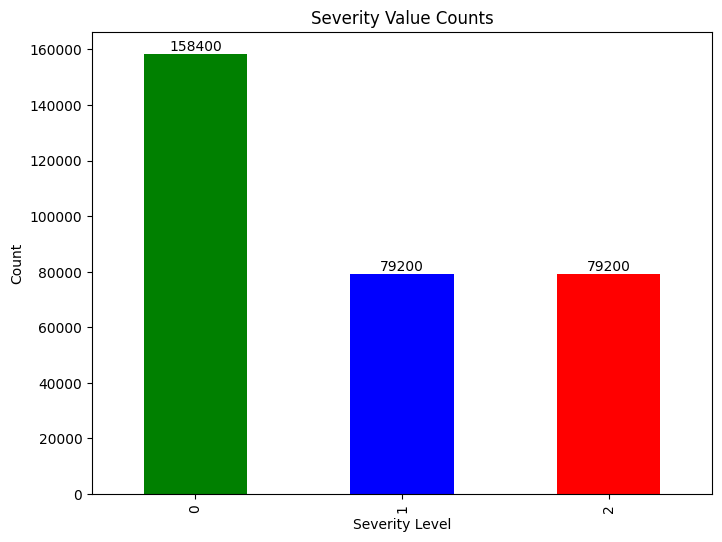

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Making a plot of the Severity variable.

# Getting the value counts
severity_counts = df['Severity'].value_counts()

# Creating a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
severity_counts.plot(kind='bar', color=['green', 'blue', 'red'])

# Adding labels and a title
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Severity Value Counts')

# Adding labels to the bars
for index, value in enumerate(severity_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


Modelling

In [ ]:
# Importing the required libraries:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Defining the features (X) and the target variable (y)
X = df[['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton',
        'Pains', 'Nasal-Congestion', 'Runny-Nose', 'None_Experiencing', 'Gender', 'Age_Group']]
y = df['Severity']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Decision Tree Classifier
model = DecisionTreeClassifier()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.496780303030303


In [ ]:
# Using a confusion matrix to provide more detailed information about the model's performance, including true positives, true negatives, false positives, and false negatives.

from sklearn.metrics import confusion_matrix, classification_report

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Printing a classification report with precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[31476     0     0]
 [15975     0     0]
 [15909     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.66     31476
           1       0.00      0.00      0.00     15975
           2       0.00      0.00      0.00     15909

    accuracy                           0.50     63360
   macro avg       0.17      0.33      0.22     63360
weighted avg       0.25      0.50      0.33     63360



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Using Hyperparameter Tuning to tune the hyperparameters of the decision tree model to improve its performance.

# We use cross-validation to find the best hyperparameters.

from sklearn.model_selection import GridSearchCV

# Defining a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10],
    # Add other hyperparameters to tune
}

# Performing a grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1}


In [ ]:
# We use feature importance to check which features have the most influence on the model's decisions. This can help with understanding the importance of each feature in predicting the severity.

# Accessing feature importances from the trained model
feature_importances = model.feature_importances_

# Matching feature importances to feature names and sort them
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)


Feature Importance:
                     Feature  Importance
10                Age_Group    0.186521
5                     Pains    0.136410
7                Runny-Nose    0.133025
6          Nasal-Congestion    0.131490
1                 Dry-Cough    0.105172
9                    Gender    0.098223
0                 Tiredness    0.086193
3               Sore-Throat    0.052643
8         None_Experiencing    0.043017
2   Difficulty-in-Breathing    0.018423
4              None_Sympton    0.008883


In [ ]:
# "Age_Group" is the most important feature, contributing approximately 18.65% to the model's decision-making process.

# "Pains" is the second most important feature, contributing about 13.64% to the model's decision-making process.

# "Runny-Nose," "Nasal-Congestion," "Dry-Cough," and "Gender" also have significant importance in influencing the model's predictions.

# Features like "Difficulty-in-Breathing," "None_Experiencing," and "None_Symptom" have relatively lower importance, indicating they have less impact on the model's decisions.